In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ising import *
import copy

plt.rcParams.update({
    "font.size" : 15,
    "font.family" : "serif",
    "image.cmap" : "jet"
})

### Ising model with dipole interactions

"Phase transitions and autocorrelation times in two-dimensional Ising model with dipole interactions"
Leandro G. Rizzi and Nelson A. Alves, 2009

https://arxiv.org/pdf/0903.4084.pdf

Ising model with nearest-neighbour ferromagnetic and long-range antiferromagnetic dipolar interaction $\sim r^{-3}$ is considered. 

$$
\begin{equation}
H = -J\sum\limits_{\left< i, j \right>}\sigma_i \sigma_j + \delta\sum\limits_{\left( i, j \right)}\frac{\sigma_i \sigma_j}{r^3_{ij}}
\tag{1}
\end{equation}
$$
, 

where $\sigma_i = \pm 1$, $\left<i, j\right>$ is sum over nearest neighbours, $\left( i, j\right)$ is sum over all distinct lattice sites. 

$\delta > 0$ to get competing interactions. 

To implement this kind of interaction, let's introduce interaction matrix, which would specify interaction strengths between spins. For example, those are interaction matrices for nearest-neighbour ferromagnetic and antiferromagnetic cases.

In [2]:
nn_interaction = -np.ones((3,3))
for i in range(-1, 2, 2):
    for j in range(-1, 2, 2):
        nn_interaction[1+i, 1+j] += 1
nn_interaction[1, 1] = 0

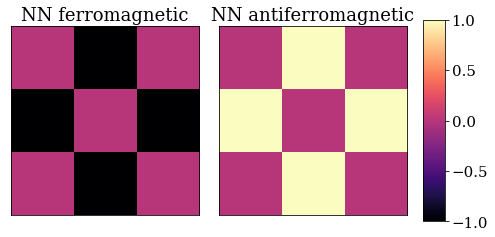

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2)

im0 = ax[0].imshow(nn_interaction, cmap='magma', vmin=-1.0, vmax=1.0)
ax[0].set_title("NN ferromagnetic")
ax[0].set_xticks([])
ax[0].set_yticks([])

im1 = ax[1].imshow(-nn_interaction, cmap='magma', vmin=-1.0, vmax=1.0)
ax[1].set_title("NN antiferromagnetic")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()
cbar_ax = fig.add_axes([1.00, 0.15, 0.05, 0.7])
fig.colorbar(im1, cax=cbar_ax)

Interaction matrix, including dipolar term

In [257]:
def interaction(delta=1.0, max_r=10):
    x = np.arange(-max_r, max_r+1)
    m = x.shape[0]
    xx, yy = np.meshgrid(x, x)

    interaction = 1/np.sqrt(xx**2+yy**2)**3
    interaction[m//2, m//2] = 0
    interaction[m//2+1,m//2] -= delta
    interaction[m//2-1,m//2] -= delta
    interaction[m//2,m//2+1] -= delta
    interaction[m//2,m//2-1] -= delta
    
    return interaction

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9936/189114269.py:6: RuntimeWarning: divide by zero encountered in true_divide
  interaction = delta/np.sqrt(xx**2+yy**2)**3


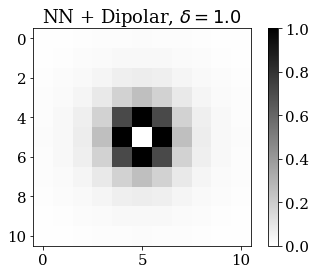

In [5]:
plt.imshow(interaction(max_r=5, delta=2.0), cmap="binary")
plt.title("NN + Dipolar, $\delta = 1.0$")
plt.colorbar()

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9936/1635886024.py:6: RuntimeWarning: divide by zero encountered in true_divide
  interaction = 1/np.sqrt(xx**2+yy**2)**3


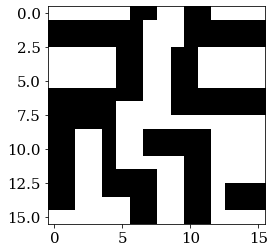

In [286]:
n = 16
field = np.random.choice([-1,1], p=[0.5, 0.5], size=(n,n))
field = ising_simulation(field, J=interaction(max_r=25, delta=3), T=0.11, maxiter=int(1e5))


plt.imshow(field, cmap='binary')
# T = np.arange(0.05, 1.05, 0.025)[::-1]
# energies = []

# for t in T:
#     field = ising_simulation(field, J=interaction(max_r=10, delta=0.6), T=t, maxiter=int(1e4))
#     energies.append(total_energy(field, interaction(max_r=10, delta=0.6)))

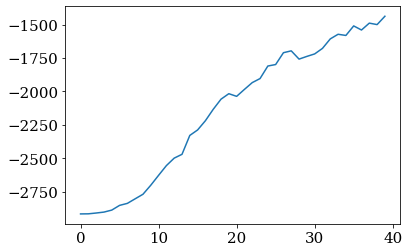

In [177]:
# plt.plot(T[::-1], energies[::-1])


plt.plot(energies[::-1])



In [11]:
def total_energy(field, J):
    n = field.shape[0]
    E = 0

    for i in range(n):
        for j in range(n):
            E += energy(field, J, [i, j])

    return E

total_energy(field, interaction(max_r=10, delta=1.0))

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9891/189114269.py:6: RuntimeWarning: divide by zero encountered in true_divide
  interaction = delta/np.sqrt(xx**2+yy**2)**3
/Users/goloshch/.conda/envs/Sandbox/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'pos' of function 'energy'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "ising.py", line 8:
@njit
def energy(field, J, pos):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


-5588.483213971987

Depending on dipolar interaction strength $\delta$ and temperature $T$, the model has 3 phases: 

- antiferromagnetic

- nematic phase

- tetragonal phase

In [54]:
deltas = np.arange(0.0, 4.0, 0.25)
fields = []

for d in deltas:
    field = ising_simulation(field, J=interaction(delta=d, max_r=20), T=0.5, maxiter=int(5e5))
    fields.append(copy.deepcopy(field))

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9488/189114269.py:6: RuntimeWarning: invalid value encountered in true_divide
  interaction = delta/np.sqrt(xx**2+yy**2)**3
/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9488/189114269.py:6: RuntimeWarning: divide by zero encountered in true_divide
  interaction = delta/np.sqrt(xx**2+yy**2)**3


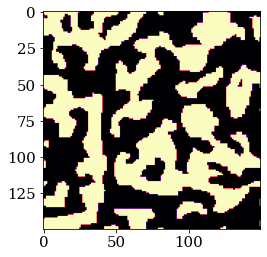

In [56]:
plt.imshow(fields[0], cmap='magma')

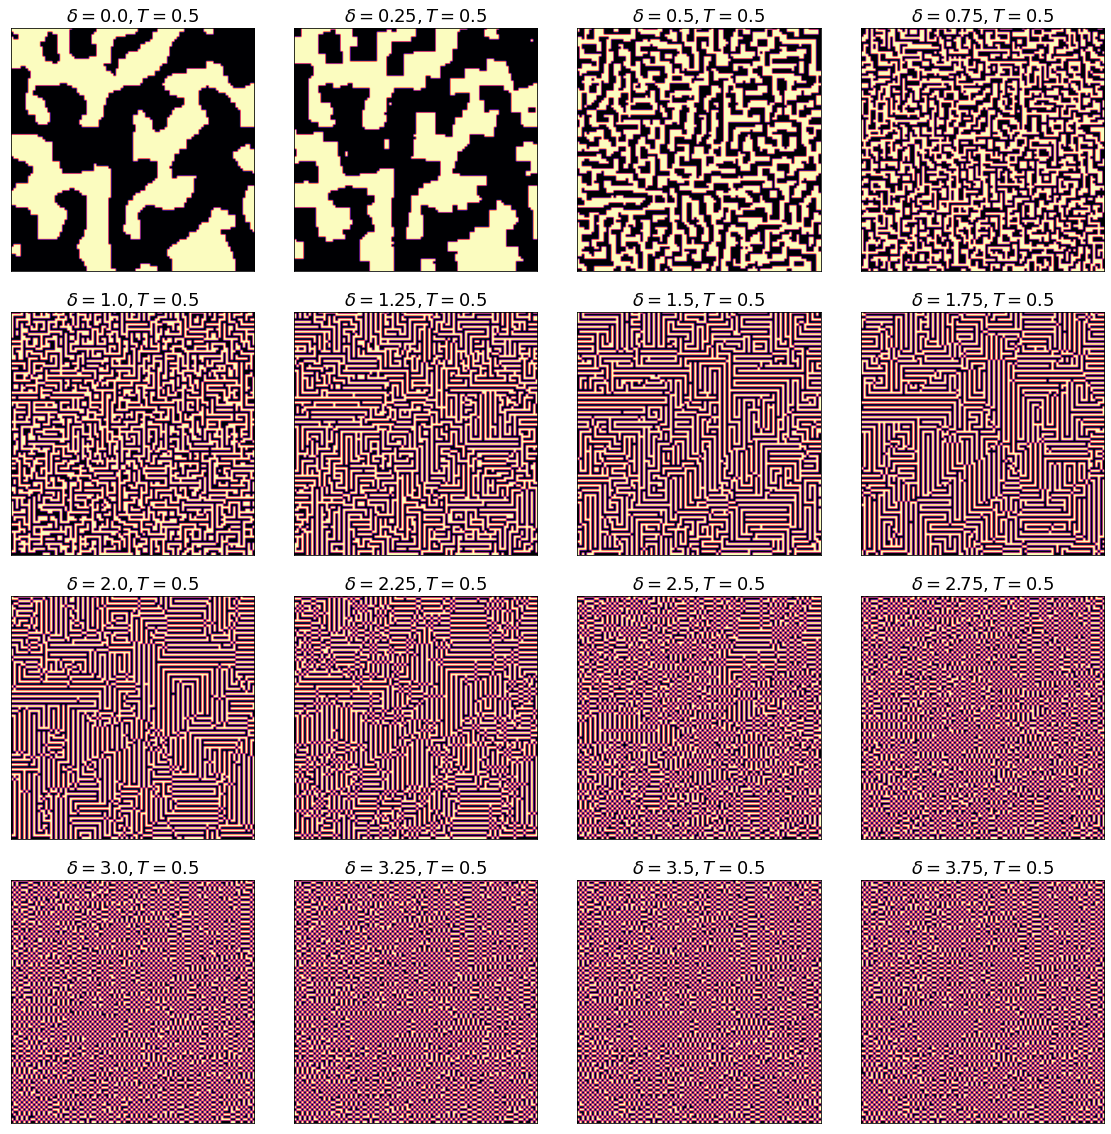

In [59]:
plt.figure(figsize=(16,16))

for field, d, i in zip(fields, deltas, range(1, 17, 1)):
    plt.subplot(4,4,i)
    plt.imshow(field[:100,:100], cmap='magma')
    plt.title("$\delta = {}, T= {}$".format(round(d, 2), 0.5))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.savefig("dipolar_total.pdf", dpi=300)

In [60]:
fields_accurate = []
deltas = [0.6, 1.5]
field = np.random.choice([-1,1], p=[0.5, 0.5], size=(n,n))

for d in deltas:
    field = ising_simulation(field, J=interaction(delta=d, max_r=25), T=0.5, maxiter=int(1e7))
    fields_accurate.append(copy.deepcopy(field))

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9488/189114269.py:6: RuntimeWarning: divide by zero encountered in true_divide
  interaction = delta/np.sqrt(xx**2+yy**2)**3


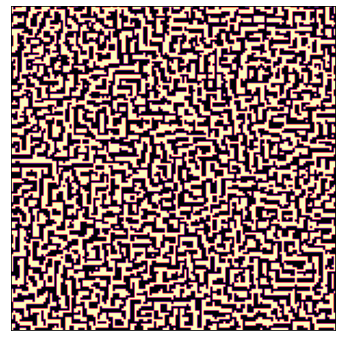

In [66]:
plt.figure(figsize=(10,5))
plt.imshow(fields_accurate[0], cmap='magma')
plt.xticks([])
plt.yticks([])

# plt.subplot(122)
# plt.imshow(fields_accurate[1], cmap='magma')
# plt.xticks([])
# plt.yticks([])

plt.tight_layout()

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9278/3549182999.py:3: RuntimeWarning: divide by zero encountered in true_divide
  interaction = 1/x**2


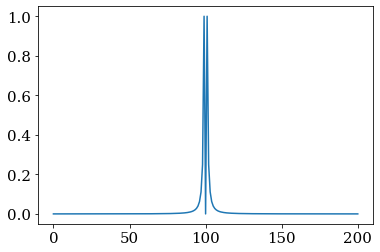

In [59]:
def interaction1d(max_r=100):
    x = np.arange(-max_r, max_r+1)
    interaction = 1/x**2
    interaction[max_r] = 0
    
    return interaction

def get_q(chain):
    return len(chain[chain==1])/len(chain)

plt.plot(interaction1d())

/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_9278/2728711325.py:3: RuntimeWarning: divide by zero encountered in true_divide
  interaction = 1/x**2


1.3364485981308412

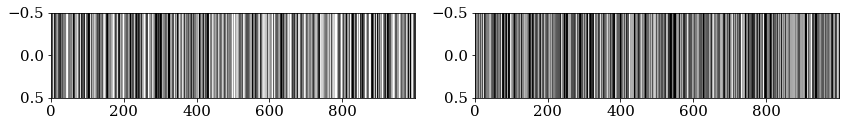

In [44]:
n = 1000
chain = np.random.choice([-1,1], p=[0.5, 0.5], size=n)

plt.figure(figsize=(12,2))
plt.subplot(121)
plt.imshow(chain[None,...], aspect='auto', cmap='binary', vmin=-1, vmax=1)

plt.subplot(122)
chain = ising_simulation1d(chain, J=interaction1d(max_r=51), T=0.2, H=-2.0, maxiter=int(1e5))
plt.imshow(chain[None,...], aspect='auto', cmap='binary', vmin=-1, vmax=1)

plt.tight_layout()

get_q(chain)